# PASO 1: Instalar librerías e importar herramientas de modelado y evaluación

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
 
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score
)

# PASO 2: PASO 2: Cargar dataset y crear variable objetivo

In [8]:
df_raw = pd.read_csv('retail_data_sample.csv')
# Crear variable objetivo: Compra_online
df_raw['ventas'] = (df_raw['total_sales'] > 1500 ).astype(int)
df_raw.head()

,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,...,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase,ventas
0,40891,65,Male,High,Yes,9,No,Divorced,2,High School,...,No,Fall,No,9.0,Yes,Medium,92.0,Medium,56.0,1
1,267732,31,Female,Low,No,3,Yes,Single,0,Bachelor's,...,No,Summer,No,16.0,Yes,High,99.0,High,120.0,1
2,262622,52,Male,Medium,No,4,Yes,Single,3,Master's,...,Yes,Spring,No,13.0,Yes,Low,84.0,Medium,122.0,0
3,295896,64,Female,Medium,Yes,7,No,Single,2,Master's,...,Yes,Winter,Yes,7.0,Yes,High,25.0,High,174.0,1
4,208360,77,Other,Medium,No,8,Yes,Divorced,3,PhD,...,Yes,Spring,No,2.0,Yes,Low,95.0,Low,355.0,1


In [9]:


# Crear variable objetivo
df_raw['ventas'] = (df_raw['total_sales'] > 1500 ).astype(int)# Seleccionar variables sin limpieza
df_before = df_raw[["unit_price", "quantity"]].dropna()
Xb = df_before.copy()
yb = df_raw.loc[df_before.index, "ventas"]


# División entrenamiento / prueba
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.3, random_state=42)

# Modelo sin limpieza
model_before = LogisticRegression(max_iter=200)
model_before.fit(Xb_train, yb_train)

# Predicción y exactitud
yb_pred = model_before.predict(Xb_test)
acc_before = accuracy_score(yb_test, yb_pred)

print("✅ Exactitud antes de la limpieza:", round(acc_before, 4))


✅ Exactitud antes de la limpieza: 0.8607


# PASO 2: Cargar dataset y crear variable objetivo

In [ ]:
df_raw = pd.read_csv("retail_data_sample.csv")
# Crear variable objetivo: Compra_online
df_raw['ventas'] = (df_raw['total_sales'] > 1500 ).astype(int)
df_raw.head()


# PASO 3: Preparación del dataset: limpieza, imputación y codificación

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Copia del dataset original
df_clean = df_raw.copy()

# Imputación de valores numéricos
imputer_unit_price = SimpleImputer(strategy='median')
df_clean['unit_price'] = imputer_unit_price.fit_transform(df_clean[['unit_price']])

imputer_quantity = SimpleImputer(strategy='mean')
df_clean['quantity'] = imputer_quantity.fit_transform(df_clean[['quantity']])


cols_to_drop = [
    'customer_id', 'transaction_id', 'transaction_date', 'last_purchase_date',
    'product_id', 'product_name', 'product_brand', 'product_manufacture_date', 'product_expiry_date',
    'promotion_id', 'promotion_start_date', 'promotion_end_date',
    'customer_zip_code', 'store_zip_code', 'customer_city', 'store_city', 'total_items_purchased',
    'customer_state', 'store_state', 'preferred_store' ,'max_single_purchase_value', 'min_single_purchase_value',
    'total_returned_items' ,'avg_spent_per_category','total_returned_value', "product_color",'store_location', 'transaction_hour','day_of_week', 'week_of_year', 'month_of_year', 'product_material',"churned"
    
]

df_clean = df_clean.drop(columns=[col for col in cols_to_drop if col in df_clean.columns])
# Variables numéricas y categóricas razonables para el modelo
categorical = ['gender', 'income_bracket', 'loyalty_program', 'marital_status', 'education_level',
               'occupation', 'season', 'weekend','payment_method', 'product_category','promotion_target_audience', 'promotion_channel','promotion_type' ,'promotion_effectiveness']

numerical = ['age', 'membership_years', 'number_of_children', 'avg_purchase_value', 
             'purchase_frequency', 'avg_discount_used', 'online_purchases', 
             'in_store_purchases', 'avg_items_per_transaction', 'avg_transaction_value',
             'product_rating', 'product_review_count', 'product_stock', 'product_return_rate',
             'product_size', 'product_weight', 'distance_to_store', 'holiday_season',
             'customer_support_calls', 'website_visits', 'days_since_last_purchase','total_transactions', "total_sales",'total_discounts_received','quantity' ,'unit_price','discount_applied' 
             , 'email_subscriptions'
            ,'app_usage','social_media_engagement'
            ]
# Filtrar el dataset para incluir solo estas variables (si existen)
vars_to_use = categorical + numerical + ['ventas']  # incluir la variable objetivo
df_model = df_clean[[col for col in vars_to_use if col in df_clean.columns]].copy()

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Imputar valores faltantes
for col in df_model.select_dtypes(include='number').columns:
    if df_model[col].isnull().sum() > 0:
        df_model[col].fillna(df_model[col].median(), inplace=True)
# Codificar variables categóricas
categorical_cols = df_model.select_dtypes(include=['object', 'category']).columns.tolist()

# Aplicar codificación one-hot
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

# Convertir columnas booleanas a enteros
df_model = df_model.astype({col: int for col in df_model.columns if df_model[col].dtype == 'bool'})

# Escalar numéricas
scaler = MinMaxScaler()
numerical_scaled = [col for col in numerical if col in df_model.columns]
df_model[numerical_scaled] = scaler.fit_transform(df_model[numerical_scaled])

# Paso 4: Evaluación del modelo después de  balancear

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Definir variables predictoras y objetivo usando el dataset limpio
Xc = df_model.drop(columns=['ventas', "total_sales"])
yc = df_model['ventas']

# División entrenamiento / prueba
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, random_state=42)

# Modelo después de la limpieza
model_after = LogisticRegression(max_iter=1000, class_weight='balanced')
model_after.fit(Xc_train, yc_train)

yc_pred = model_after.predict(Xc_test)
acc_after = accuracy_score(yc_test, yc_pred)

print("✅ Exactitud después (balanceado):", round(acc_after, 2))
print(classification_report(yc_test, yc_pred, zero_division=1))
import numpy as np

print("Distribución real en y_test:")
print(np.bincount(yc_test))

print("Distribución de predicciones:")
print(np.bincount(yc_pred))

✅ Exactitud después (balanceado): 0.54
              precision    recall  f1-score   support

           0       0.15      0.48      0.22       418
           1       0.87      0.55      0.67      2582

    accuracy                           0.54      3000
   macro avg       0.51      0.51      0.45      3000
weighted avg       0.77      0.54      0.61      3000

Distribución real en y_test:
[ 418 2582]
Distribución de predicciones:
[1364 1636]


### Regresión logística

In [12]:
log_model = LogisticRegression(max_iter=300, class_weight='balanced')
log_model.fit(Xc_train, yc_train)
log_model.fit(Xc_train, yc_train)
log_pred = log_model.predict(Xc_test)
log_prob = log_model.predict_proba(Xc_test)[:, 1]

print("📊 Logistic Regression Accuracy:", round(accuracy_score(yc_test, log_pred), 6))
print(classification_report(yc_test, log_pred))

📊 Logistic Regression Accuracy: 0.538667
              precision    recall  f1-score   support

           0       0.15      0.48      0.22       418
           1       0.87      0.55      0.67      2582

    accuracy                           0.54      3000
   macro avg       0.51      0.51      0.45      3000
weighted avg       0.77      0.54      0.61      3000



##### Curva ROC  y Matriz de Confusión

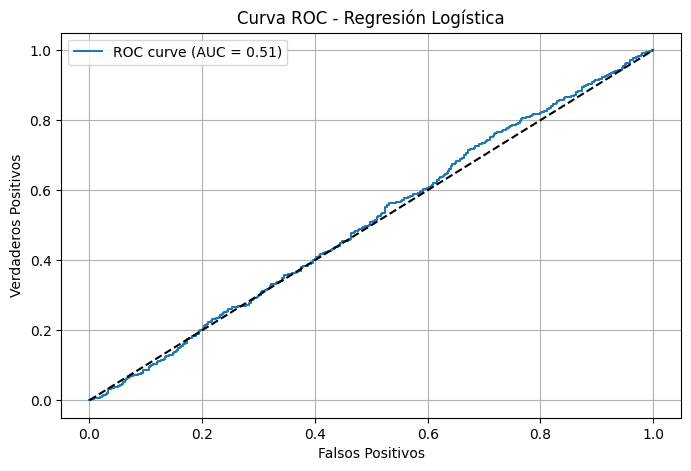

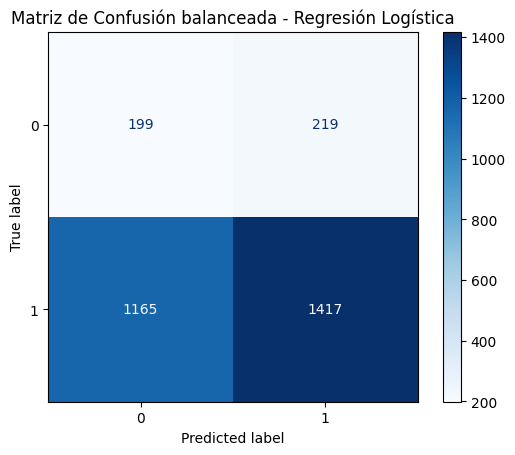

In [13]:
fpr, tpr, _ = roc_curve(yc_test, log_prob)
roc_auc = roc_auc_score(yc_test, log_prob)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Curva ROC - Regresión Logística')
plt.legend()
plt.grid(True)
plt.show()

ConfusionMatrixDisplay.from_estimator(log_model, Xc_test, yc_test, cmap="Blues")
plt.title("Matriz de Confusión balanceada - Regresión Logística")
plt.show()

El AUC es de 51%, lo cual está muy cerca de que los datos sean al azar, por lo cual nos esta diciendo que el modleo no esta aprendiendo bien, ya que no distingue bien entre clase 0 y 1.
Mientras que la matriz de confusión balanceada tenemos que el modelo predice 0 cuando en realidad era 1, Recall 0= (199/219+199)= 199/418≈0.476 (el modelo logró detectar el 47.6% de los clientes que realmente tuvieron ventas pequeñas.) Tenemos muchos falsos negativos  ya que modelo dice "ventas pequeñas" (0), pero en realidad era "ventas grandes" (1). Teniendo que hay 1165 de estos.

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(Xc_train, yc_train)
knn_pred = knn_model.predict(Xc_test)

print("🔎 KNN Accuracy:", round(accuracy_score(yc_test, knn_pred), 4))
print(classification_report(yc_test, knn_pred))

🔎 KNN Accuracy: 0.8477
              precision    recall  f1-score   support

           0       0.23      0.04      0.07       418
           1       0.86      0.98      0.92      2582

    accuracy                           0.85      3000
   macro avg       0.54      0.51      0.49      3000
weighted avg       0.77      0.85      0.80      3000



### Árbol de decisión

🌳 Árbol de Decisión Accuracy: 0.776
              precision    recall  f1-score   support

           0       0.15      0.14      0.15       418
           1       0.86      0.88      0.87      2582

    accuracy                           0.78      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.76      0.78      0.77      3000



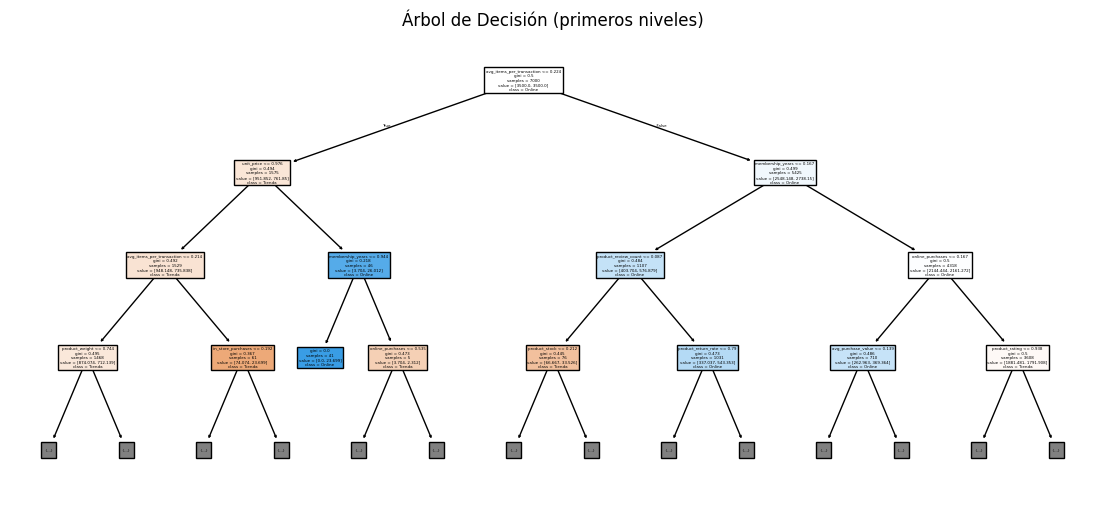

In [20]:
tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
tree_model.fit(Xc_train, yc_train)
tree_pred = tree_model.predict(Xc_test)

print("🌳 Árbol de Decisión Accuracy:", round(accuracy_score(yc_test, tree_pred), 4))
print(classification_report(yc_test, tree_pred))

plt.figure(figsize=(14, 6))
plot_tree(tree_model, filled=True, max_depth=3, feature_names=Xc.columns, class_names=["Tienda", "Online"])
plt.title("Árbol de Decisión (primeros niveles)")
plt.show()

El nodo raíz usa avg_items_per_transaction nuevamente, reafirmando su poder predictivo.

Otras variables clave:

* avg_transaction_value

* total_discounts_received

* membership_years

* product_weight

* website_visits

* Detecta correctamente el 16% de los clientes que NO hicieron compras grandes (recall = 0.16 para clase 0).

* Buen desempeño en la clase 1 (ventas grandes), con 86% en todas las métricas.

## Comparación modelos balanceados

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

models = {
    'KNN': KNeighborsClassifier(),
    'Regresión Logística': LogisticRegression(max_iter=300,class_weight='balanced'),
    'Árbol de Decisión': DecisionTreeClassifier(class_weight='balanced')
}

for name, model in models.items():
    scores = cross_val_score(model, Xc_train, yc_train, cv=5, scoring='accuracy')
    print(f"{name}: Exactitud promedio (cross-val): {scores.mean():.3f} ± {scores.std():.3f}")



KNN: Exactitud promedio (cross-val): 0.850 ± 0.004
Regresión Logística: Exactitud promedio (cross-val): 0.539 ± 0.018
Árbol de Decisión: Exactitud promedio (cross-val): 0.776 ± 0.010


* KNN No se le puede realizar  balanceo, entonces estos datos puede estar sesgado a la clase mayoritaria.
* Regresión logística: Es mucho más baja, ya que intenta  equilibrar clases, pero eso reduce la precisión global. Se observa una mejora en el recall de la clase minoritaria.
* Árbol de Decisión: Tiene buen equilibrio entre exactitud y capacidad de aprender reglas no lineales, es mejor reconociendo la clase 0 en comparación a el KNN y la regresión logística.  